# Smart San Antonio

## Flood Level Data

In [1]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Geospatial Library
import folium
import src

plt.style.use('tableau-colorblind10')

## Acquire

In [2]:
df = src.get_zone_data(sensor='flood_level', zone='all')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47853 entries, 0 to 47852
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        47853 non-null  object 
 1   Sensor_id       47853 non-null  int64  
 2   Vendor          47853 non-null  object 
 3   SensorModel     47853 non-null  object 
 4   LAT             47853 non-null  float64
 5   LONG            47853 non-null  float64
 6   Zone            47853 non-null  object 
 7   Temp_C          47853 non-null  int64  
 8   Temp_F          47853 non-null  int64  
 9   DistToWL_ft     47853 non-null  float64
 10  DistToWL_m      47853 non-null  float64
 11  DistToDF_ft     47853 non-null  float64
 12  DistToDF_m      47853 non-null  float64
 13  AlertTriggered  15989 non-null  object 
 14  SensorStatus    47853 non-null  object 
dtypes: float64(6), int64(3), object(6)
memory usage: 5.5+ MB


In [4]:
df.head(3)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,DistToWL_ft,DistToWL_m,DistToDF_ft,DistToDF_m,AlertTriggered,SensorStatus
0,2021-06-01T00:02:55,400791,ATT,ranger sensor,29.345167,-98.451583,Brooks,-999,-999,14.370079,4.38,15.833333,4.826,N,Normal
1,2021-06-01T00:07:55,400791,ATT,ranger sensor,29.345167,-98.451583,Brooks,-999,-999,14.370079,4.38,15.833333,4.826,N,Normal
2,2021-06-01T00:12:55,400791,ATT,ranger sensor,29.345167,-98.451583,Brooks,-999,-999,14.402887,4.39,15.833333,4.826,N,Normal


In [5]:
df.tail(3)

,DateTime,Sensor_id,Vendor,SensorModel,LAT,LONG,Zone,Temp_C,Temp_F,DistToWL_ft,DistToWL_m,DistToDF_ft,DistToDF_m,AlertTriggered,SensorStatus
47850,2021-06-05T23:45:00,61447,ITRON,AU500,29.51096,-98.58604,Medical Center,-999,-999,0.2083,0.0635,-999.0,-999.0,NaN,Normal
47851,2021-06-05T23:50:00,61447,ITRON,AU500,29.51096,-98.58604,Medical Center,-999,-999,0.2167,0.0660,-999.0,-999.0,NaN,Normal
47852,2021-06-05T23:55:00,61447,ITRON,AU500,29.51096,-98.58604,Medical Center,-999,-999,0.2083,0.0635,-999.0,-999.0,NaN,Normal


In [6]:
df.isna().sum()

DateTime              0
Sensor_id             0
Vendor                0
SensorModel           0
LAT                   0
LONG                  0
Zone                  0
Temp_C                0
Temp_F                0
DistToWL_ft           0
DistToWL_m            0
DistToDF_ft           0
DistToDF_m            0
AlertTriggered    31864
SensorStatus          0
dtype: int64

In [7]:
df.nunique()

DateTime          25338
Sensor_id             6
Vendor                2
SensorModel           2
LAT                   6
LONG                  6
Zone                  3
Temp_C                1
Temp_F                1
DistToWL_ft         781
DistToWL_m          753
DistToDF_ft           4
DistToDF_m            4
AlertTriggered        2
SensorStatus          2
dtype: int64

In [8]:
df.describe()

,Sensor_id,LAT,LONG,Temp_C,Temp_F,DistToWL_ft,DistToWL_m,DistToDF_ft,DistToDF_m
count,47853.000000,47853.000000,47853.000000,47853.0,47853.0,47853.000000,47853.000000,47853.000000,47853.000000
mean,174825.591980,29.421559,-98.504911,-999.0,-999.0,-39.259857,-43.329640,-660.700369,-663.833167
std,160066.959919,0.068813,0.056991,0.0,0.0,208.782331,207.841359,477.581644,473.156995
min,61433.000000,29.344070,-98.586094,-999.0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000
25%,61440.000000,29.345167,-98.586040,-999.0,-999.0,1.684200,0.513300,-999.000000,-999.000000
50%,61447.000000,29.421890,-98.485190,-999.0,-999.0,5.125000,1.562100,-999.000000,-999.000000
75%,400783.000000,29.510960,-98.452230,-999.0,-999.0,9.776903,2.980000,9.665354,2.946000
max,400791.000000,29.511164,-98.451583,-999.0,-999.0,15.321522,4.670000,15.833333,4.826000


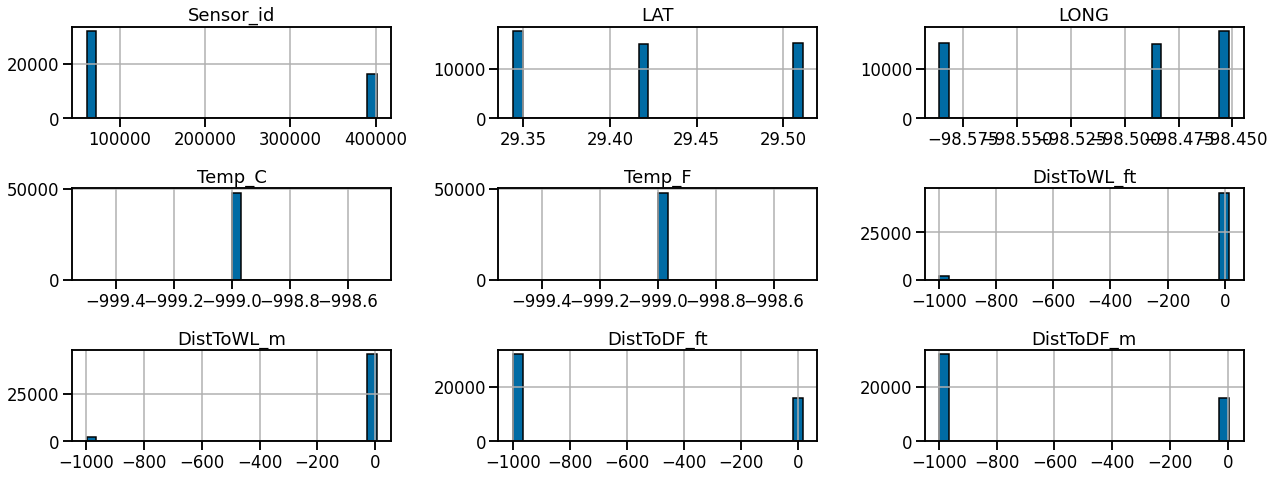

In [9]:
sns.set_context('talk')
plt.style.use('tableau-colorblind10')

df.hist(figsize=(18, 7), bins=30, ec='black')
plt.tight_layout();

## Prepare

- Format column names
- Replace column names with descriptive names
- Cast the date strings as datetime.
- Replace missing values in the `alert_triggered` column with "Not Supported".
    - Refer to the data dictionary.

In [10]:
df = src.prep_data(data=df, filename='water')

## Explore

In [11]:
df.head(2)

,date,sensor_id,vendor,sensor_model,latitude,longitude,zone,temp_f,dist_to_water_ft,dist_to_floor_ft,alert_triggered,sensor_status,water_level
0,2021-06-01 00:02:55,400791,ATT,ranger sensor,29.345167,-98.451583,Brooks,-999,14.370079,15.833333,No,Normal,1.463255
1,2021-06-01 00:07:55,400791,ATT,ranger sensor,29.345167,-98.451583,Brooks,-999,14.370079,15.833333,No,Normal,1.463255


## How many flood level sensors were placed in each zone for the pilot program?

In [12]:
df.groupby('zone').sensor_id.nunique()

zone
Brooks            2
Downtown          2
Medical Center    2
Name: sensor_id, dtype: int64

## Where are the Noise Sensors located?

In [13]:
geo_cols = ['zone', 'sensor_id', 'latitude', 'longitude']
df_sensors = df.groupby(geo_cols).size().reset_index().rename(columns={0:'count'})

df_sensors

,zone,sensor_id,latitude,longitude,count
0,Brooks,61433,29.344070,-98.452230,10531
1,Brooks,400791,29.345167,-98.451583,7166
2,Downtown,61440,29.421890,-98.485190,10554
3,Downtown,400783,29.421882,-98.485166,4416
4,Medical Center,61447,29.510960,-98.586040,10779
5,Medical Center,400789,29.511164,-98.586094,4407


In [14]:
m = folium.Map(location=[29.4363, -98.4881],
               zoom_start=10,
               max_bounds=True,
               zoom_control=False)

# Plot the coordinates for each noise sensor.

zone_colors = ['orange', 'red', 'purple']
zones = ['Brooks', 'Downtown', 'Medical Center']

for z, zc in zip(zones, zone_colors):
    data = df_sensors[df_sensors.zone == z]

    for _, row in data.iterrows():
        m.add_child(
            folium.Marker(location=[str(row['latitude']), str(row['longitude'])],
                          tooltip=row['zone'],
                          prefer_canvas=True,
                          disable_3d=True,
                          icon=folium.Icon(icon='water',
                                           color=zc,
                                           prefix='fa')
                         )
                    )

In [15]:
m

## What is the highest water level recorded in each zone? 

In [16]:
df_water_level_stats = df.groupby('zone').dist_to_water_ft.describe(percentiles=[.00125, .25, .75, .997]).reset_index()

df_water_level_stats

,zone,count,mean,std,min,0.1%,25%,50%,75%,99.7%,max
0,Brooks,17697.0,6.945349,6.074653,0.0,1.619200,1.8450,2.1967,14.304462,14.599738,15.321522
1,Downtown,14970.0,6.491649,2.054168,0.0,4.034125,5.1608,5.2258,9.547244,10.272080,12.204724
2,Medical Center,15186.0,-138.205831,350.676751,-999.0,-999.000000,0.1750,0.2500,12.926509,13.400427,13.484252


In [17]:
q3 = np.percentile(df['dist_to_water_ft'], 75)
q1 = np.percentile(df['dist_to_water_ft'], 25)
iqr = (q3 - q1)

upper_bound = (iqr * 3) + q3

outliers = df.loc[df.dist_to_water_ft > upper_bound].sort_values('date').reset_index(drop=True)

In [18]:
outliers

,date,sensor_id,vendor,sensor_model,latitude,longitude,zone,temp_f,dist_to_water_ft,dist_to_floor_ft,alert_triggered,sensor_status,water_level


## What is the water level throughout the day for each zone?

In [29]:
water = df.groupby(['date', 'zone']).water_level.agg(['mean']).sort_values(by=['zone', 'date']).reset_index()

In [30]:
water.set_index(pd.DatetimeIndex(water['date']), inplace=True)

In [31]:
water

,date,zone,mean
date,,,
2021-04-28 00:15:00,2021-04-28 00:15:00,Brooks,-1000.6492
2021-04-28 02:00:00,2021-04-28 02:00:00,Brooks,-1000.6425
2021-04-28 02:15:00,2021-04-28 02:15:00,Brooks,-1000.6550
2021-04-28 03:15:00,2021-04-28 03:15:00,Brooks,-1000.6608
2021-04-28 03:30:00,2021-04-28 03:30:00,Brooks,-1000.6667
...,...,...,...
2021-06-05 23:35:00,2021-06-05 23:35:00,Medical Center,-999.2083
2021-06-05 23:40:00,2021-06-05 23:40:00,Medical Center,-999.2083
2021-06-05 23:45:00,2021-06-05 23:45:00,Medical Center,-999.2083


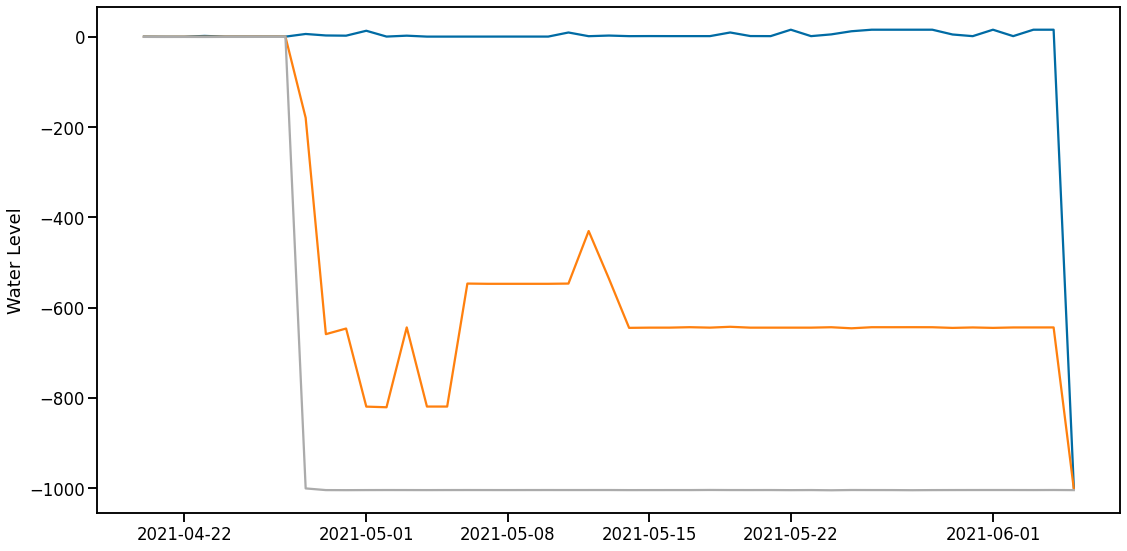

In [32]:
sns.set_context('talk')

plt.figure(figsize=(16, 8))
plt.plot(water.resample('D').agg(['max', 'mean', 'min']))

plt.xlabel('')
plt.ylabel('Water Level')
plt.tight_layout();

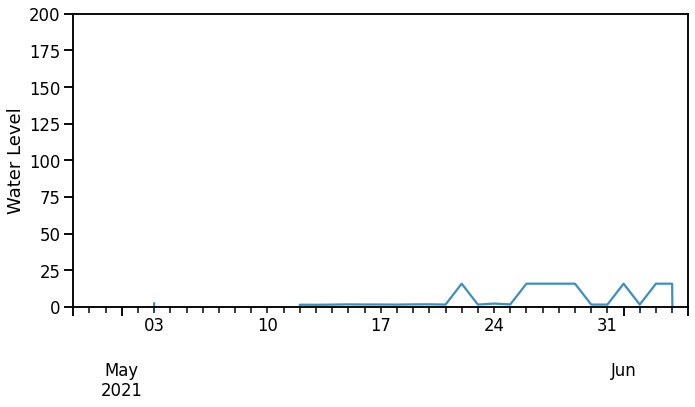

In [33]:
water[water.zone=='Brooks'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Water Level')

plt.ylim(0, 200)
plt.tight_layout();

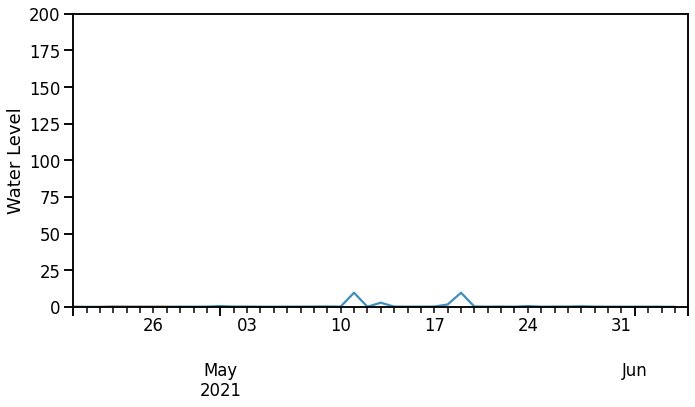

In [34]:
water[water.zone=='Downtown'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Water Level')

plt.ylim(0, 200)
plt.tight_layout();

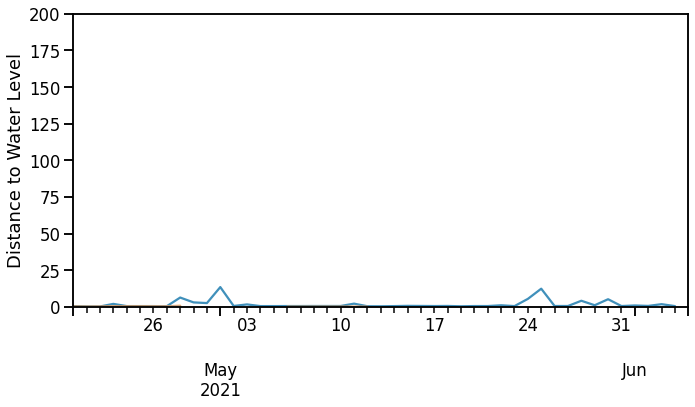

In [35]:
water[water.zone == 'Medical Center'].resample('D').agg(['max', 'mean', 'min']).plot(figsize=(10, 6), alpha=.75, legend=False)

plt.xlabel('')
plt.ylabel('Distance to Water Level')

plt.ylim(0, 200)
plt.tight_layout();

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

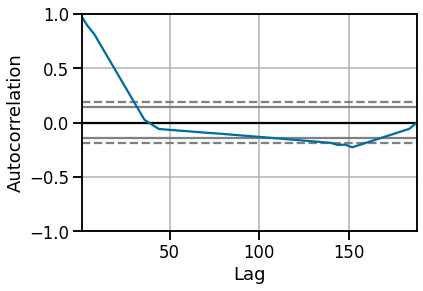

In [36]:
pd.plotting.autocorrelation_plot(water[water.zone=='Downtown'].resample('6H').mean())

In [37]:
top_dates = water.sort_values(by=['mean'],ascending=False).head(3)
vals = []
for tgl, tot in zip(top_dates.index, top_dates["mean"]):
    tgl = tgl.strftime("%d %B")
    val = "%d (%s)"%(tot, tgl)
    vals.append(val)
top_dates['tgl'] = vals
top_dates

,date,zone,mean,tgl
date,,,,
2021-05-27 09:11:55,2021-05-27 09:11:55,Brooks,15.833333,15 (27 May)
2021-05-28 18:26:55,2021-05-28 18:26:55,Brooks,15.833333,15 (28 May)
2021-06-03 23:57:55,2021-06-03 23:57:55,Brooks,15.833333,15 (03 June)


In [38]:
fig = go.Figure(data=go.Scatter(x=water.index.astype(dtype=str), 
                                y=water['mean'],
                                text="counts"))

fig.update_layout({"title": 'Water level in all zones',
                   "yaxis": {"title": r"Distance to Water Level"},
                   "showlegend": False})

fig.add_traces(go.Scatter(x=top_dates['date'], y=top_dates['mean'],
                          textposition='top center',
                          textfont=dict(color='#233a77'),
                          mode='markers+text',
                          marker=dict(color='red', size=8),
                          text = top_dates["tgl"]))

fig.update_traces(textfont_size=12)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
xaxis_range=['2021-04-15','2021-06-01'],
yaxis_range=[0, 250])

fig.show()

### Hypothesis Tests

## Conclusions 